# Autocorrelation

In [39]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt


f1='C:/Users/laelu/fma/data/fma_electronic/001066.mp3'
y , sr = librosa.load(f1,duration=10)
hop_length = 512

C:\Users\laelu\anaconda3\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


### Onset Strength Autocorrelation

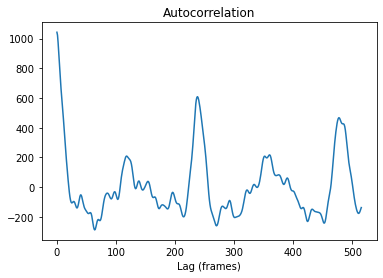

In [31]:
ac = librosa.autocorrelate(y,max_size=12*sr/512)

plt.plot(ac)
plt.title('Autocorrelation')
plt.xlabel('Lag (frames)')
plt.show()

### Tempogram (unnormalized/raw self-similarity) vs. Onset Strength Envelope

C:\Users\laelu\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


[Text(0.5, 1.0, 'Autocorrelation Tempogram')]

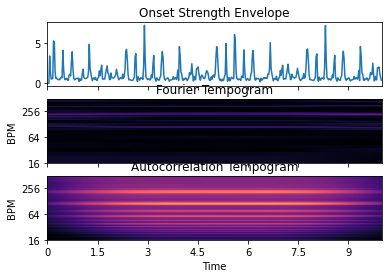

In [40]:
onset_env=librosa.onset.onset_strength(y=y, sr=sr)

tempogram = librosa.feature.fourier_tempogram(onset_envelope=onset_env, sr=sr,hop_length=hop_length)

ac_tempogram = librosa.feature.tempogram(onset_envelope=onset_env, sr=sr,hop_length=hop_length, norm=None)

fig, ax = plt.subplots(nrows=3, sharex=True)

ax[0].set(title='Onset Strength Envelope')
ax[0].plot(librosa.times_like(onset_env), onset_env)
ax[0].label_outer()

librosa.display.specshow(np.abs(tempogram), sr=sr, hop_length=hop_length,x_axis='time', y_axis='fourier_tempo', cmap='magma',ax=ax[1])
ax[1].set(title='Fourier Tempogram')
ax[1].label_outer()

librosa.display.specshow(ac_tempogram, sr=sr, hop_length=hop_length,x_axis='time', y_axis='tempo', cmap='magma',ax=ax[2])
ax[2].set(title='Autocorrelation Tempogram')